In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Utils
import src.utils.visualization.gantt_diagram as gantt

from src.utils.initialization.gen_deadlines import add_groupwise_lognormal_deadlines_by_group_mean, ensure_reasonable_deadlines
from src.utils.analysis_basics.check_gen_deadlines import plotfig_empirical_flow_budget_distributions

# Simulation
from src.simulation.ProductionSimulation import ProductionSimulation

# Database and Collections
from src.classes.Query import RoutingQuery, JobQuery  # for database access
from src.classes.Initializer import ExperimentInitializer

from src.classes.Collection import JobMixCollection, RoutingCollection               # for simulation and processing

pd.set_option('display.min_rows', 12)
pd.set_option('display.max_rows', 16)


In [2]:
routings = RoutingQuery.get_by_source_name(source_name="Fisher and Thompson 10x10")
RoutingCollection(routings).to_dataframe()

,Routing_ID,Operation,Machine,Processing Time
0,0,0,M00,29
1,0,1,M01,78
2,0,2,M02,9
3,0,3,M03,36
4,0,4,M04,49
5,0,5,M05,11
...,...,...,...,...
94,9,4,M08,64
95,9,5,M09,76
96,9,6,M05,47


In [3]:
experiment = ExperimentInitializer.add_experiment(total_shift_number=360, max_bottleneck_utilization=0.90)
experiment_id = experiment.id
experiment

Experiment(id=2, total_shift_number=360, main_pct=0.5, w_t=10, w_e=2, w_first=1, max_bottleneck_utilization=0.9, sim_sigma=0.25)

In [4]:
ExperimentInitializer.insert_jobs(
    routings=routings,
    experiment=experiment
)

jobs = JobQuery.get_by_experiment_id(experiment_id=experiment_id)
job_problem_collection = JobMixCollection(jobs)
job_problem_collection.to_dataframe()

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,J002-0000,7,0,M02,None,31,None,1440,None
1,J002-0000,7,1,M00,None,86,None,1440,None
2,J002-0000,7,2,M01,None,46,None,1440,None
3,J002-0000,7,3,M05,None,74,None,1440,None
4,J002-0000,7,4,M04,None,32,None,1440,None
5,J002-0000,7,5,M06,None,88,None,1440,None
...,...,...,...,...,...,...,...,...,...
72734,J002-7273,5,4,M08,None,48,None,519840,None
72735,J002-7273,5,5,M09,None,72,None,519840,None
72736,J002-7273,5,6,M00,None,47,None,519840,None


In [ ]:
# print (experiment)

In [6]:
for job in list(job_problem_collection.values())[:5]:
    print(job)
    for operation in job.operations:
        print(f"\t {operation}")

Job(id='J002-0000', routing_id='7', experiment_id=2, arrival=0, earliest_start=1440, deadline=None, sum_duration=539)
	 JobOperation(job_id='J002-0000', position_number=0, machine='M02', duration=31)
	 JobOperation(job_id='J002-0000', position_number=1, machine='M00', duration=86)
	 JobOperation(job_id='J002-0000', position_number=2, machine='M01', duration=46)
	 JobOperation(job_id='J002-0000', position_number=3, machine='M05', duration=74)
	 JobOperation(job_id='J002-0000', position_number=4, machine='M04', duration=32)
	 JobOperation(job_id='J002-0000', position_number=5, machine='M06', duration=88)
	 JobOperation(job_id='J002-0000', position_number=6, machine='M08', duration=19)
	 JobOperation(job_id='J002-0000', position_number=7, machine='M09', duration=48)
	 JobOperation(job_id='J002-0000', position_number=8, machine='M07', duration=36)
	 JobOperation(job_id='J002-0000', position_number=9, machine='M03', duration=79)
Job(id='J002-0001', routing_id='6', experiment_id=2, arrival=5

## I. Simulation

In [7]:
simulation = ProductionSimulation(with_earliest_start=True, sigma = 0, verbose = False)
simulation.run(job_problem_collection, start_time = 0, end_time = None)

In [8]:
finished_operations = simulation.get_finished_operation_collection()
df_fcfs = finished_operations.to_dataframe()
df_fcfs


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,J002-0000,7,0,M02,1440.0,31.0,1471.0,1440,None
1,J002-0000,7,1,M00,1707.0,86.0,1793.0,1440,None
2,J002-0000,7,2,M01,2183.0,46.0,2229.0,1440,None
3,J002-0000,7,3,M05,2229.0,74.0,2303.0,1440,None
4,J002-0000,7,4,M04,2337.0,32.0,2369.0,1440,None
5,J002-0000,7,5,M06,2370.0,88.0,2458.0,1440,None
...,...,...,...,...,...,...,...,...,...
72734,J002-7268,9,4,M08,520980.0,64.0,521044.0,519840,None
72735,J002-7268,9,5,M09,521044.0,76.0,521120.0,519840,None
72736,J002-7268,9,6,M05,521281.0,47.0,521328.0,519840,None


In [ ]:
#if day_count <= 5:
#    gantt.get_plot(df_fcfs_execution, perspective="Machine")

In [9]:
df_jobs_times_temp = finished_operations.to_last_ops_dataframe()
df_jobs_times_temp


,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,Total Processing Time
2,J002-0001,6,9,M04,2233.0,55.0,2288.0,1440,None,416.0
6,J002-0005,2,9,M04,2382.0,33.0,2415.0,1440,None,568.0
14,J002-0010,6,9,M04,2428.0,55.0,2483.0,1440,None,416.0
4,J002-0003,5,9,M07,2627.0,25.0,2652.0,1440,None,496.0
0,J002-0000,7,9,M03,2744.0,79.0,2823.0,1440,None,539.0
3,J002-0006,0,9,M09,2752.0,21.0,2773.0,1440,None,395.0
...,...,...,...,...,...,...,...,...,...,...
7273,J002-7268,9,9,M07,522143.0,45.0,522188.0,519840,None,540.0
7260,J002-7267,0,9,M09,522187.0,21.0,522208.0,519840,None,395.0
7263,J002-7266,4,9,M06,522187.0,53.0,522240.0,519840,None,393.0


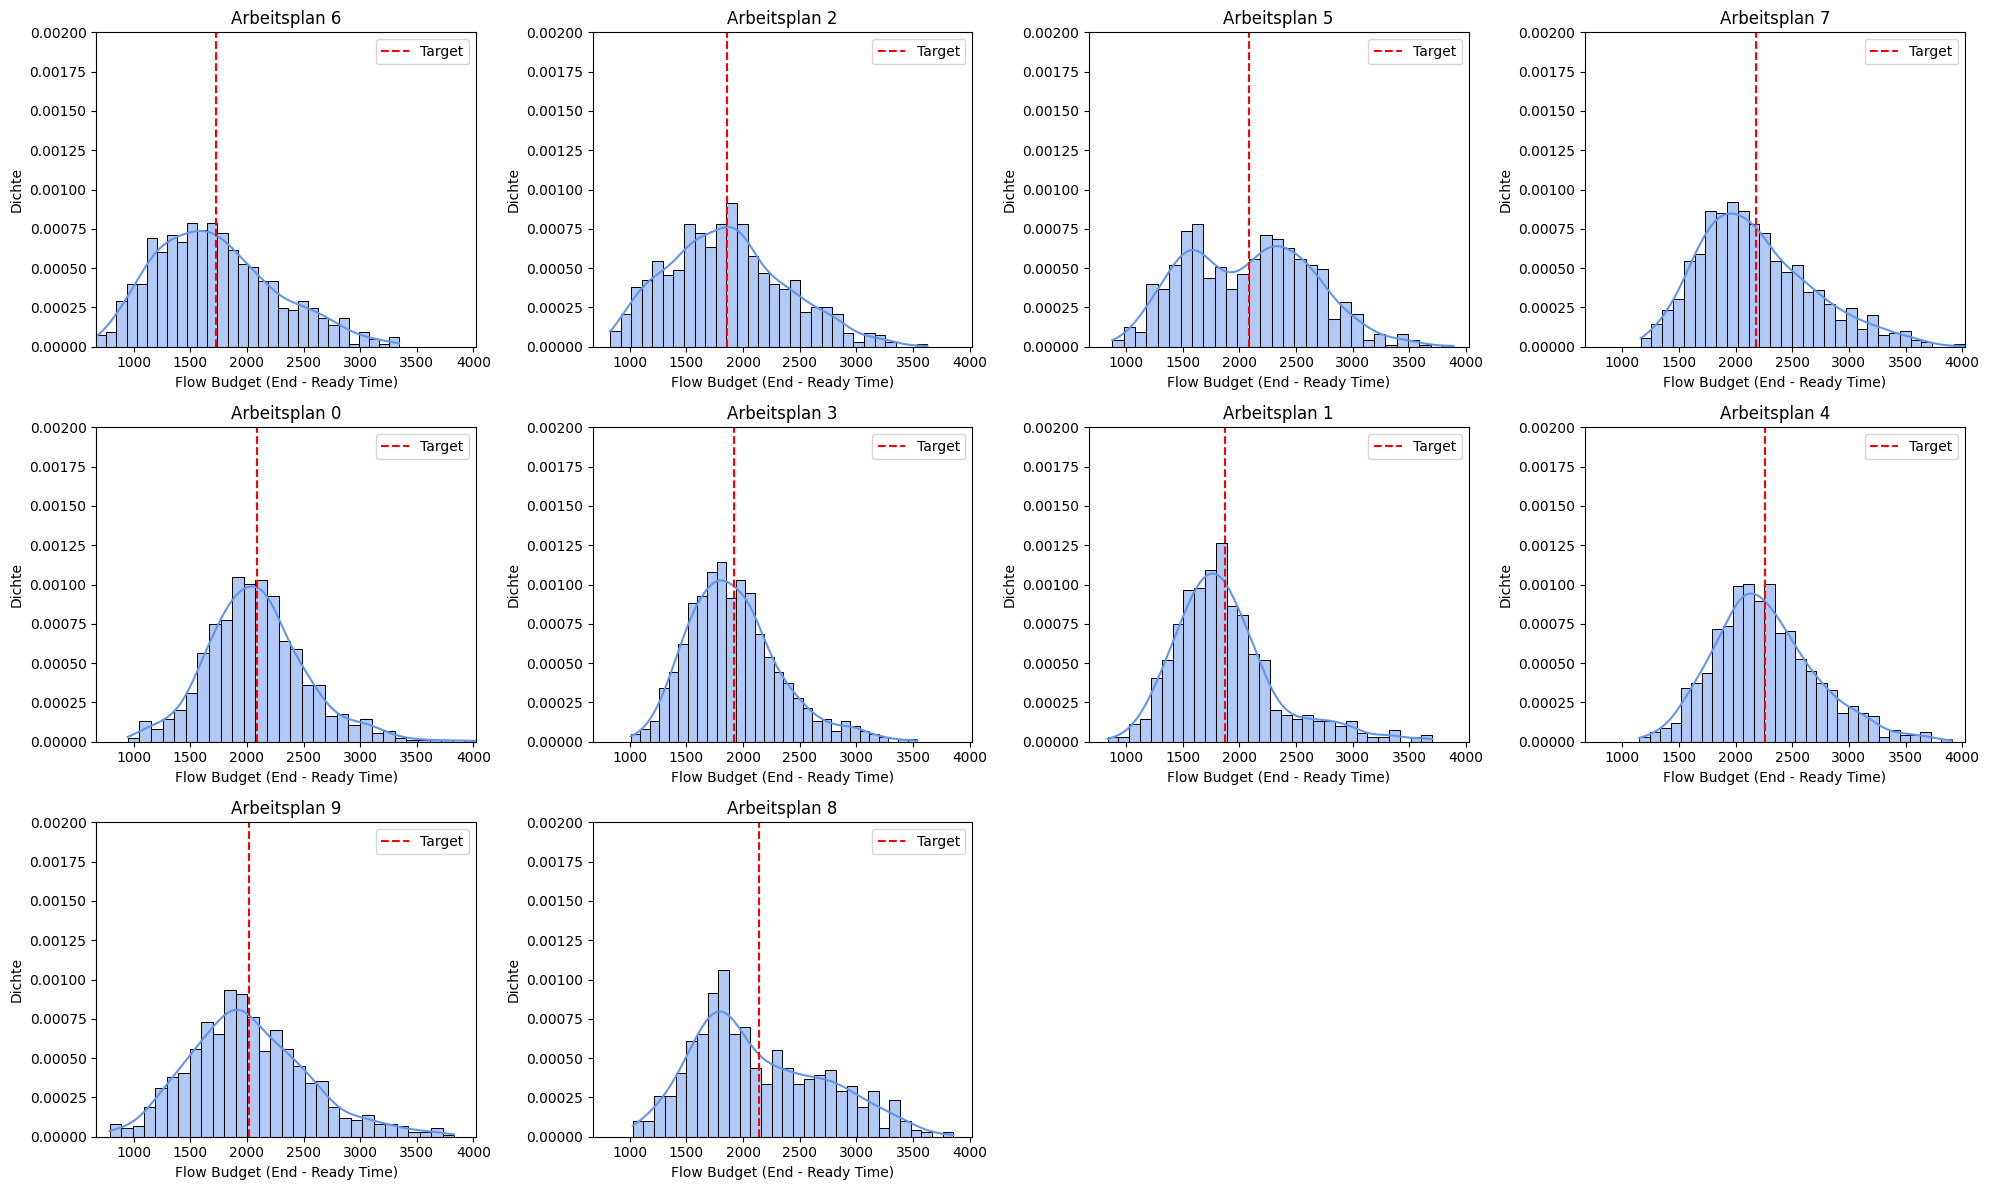

In [10]:
plotfig_empirical_flow_budget_distributions(df_jobs_times_temp, deadline_column="End", y_max=0.002)
plt.show()

### II. Generation of deadlines using log-normal distribution

In [11]:
df_jobs_times = add_groupwise_lognormal_deadlines_by_group_mean(df_jobs_times_temp, sigma=0.25)
df_jobs_times

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline,Total Processing Time
2,J002-0001,6,9,M04,2233.0,55.0,2288.0,1440,4267.0,416.0
6,J002-0005,2,9,M04,2382.0,33.0,2415.0,1440,3613.0,568.0
14,J002-0010,6,9,M04,2428.0,55.0,2483.0,1440,2907.0,416.0
4,J002-0003,5,9,M07,2627.0,25.0,2652.0,1440,3655.0,496.0
0,J002-0000,7,9,M03,2744.0,79.0,2823.0,1440,2934.0,539.0
3,J002-0006,0,9,M09,2752.0,21.0,2773.0,1440,3729.0,395.0
...,...,...,...,...,...,...,...,...,...,...
7273,J002-7268,9,9,M07,522143.0,45.0,522188.0,519840,521687.0,540.0
7260,J002-7267,0,9,M09,522187.0,21.0,522208.0,519840,521871.0,395.0
7263,J002-7266,4,9,M06,522187.0,53.0,522240.0,519840,521854.0,393.0


### b) Plot of the new deadlines

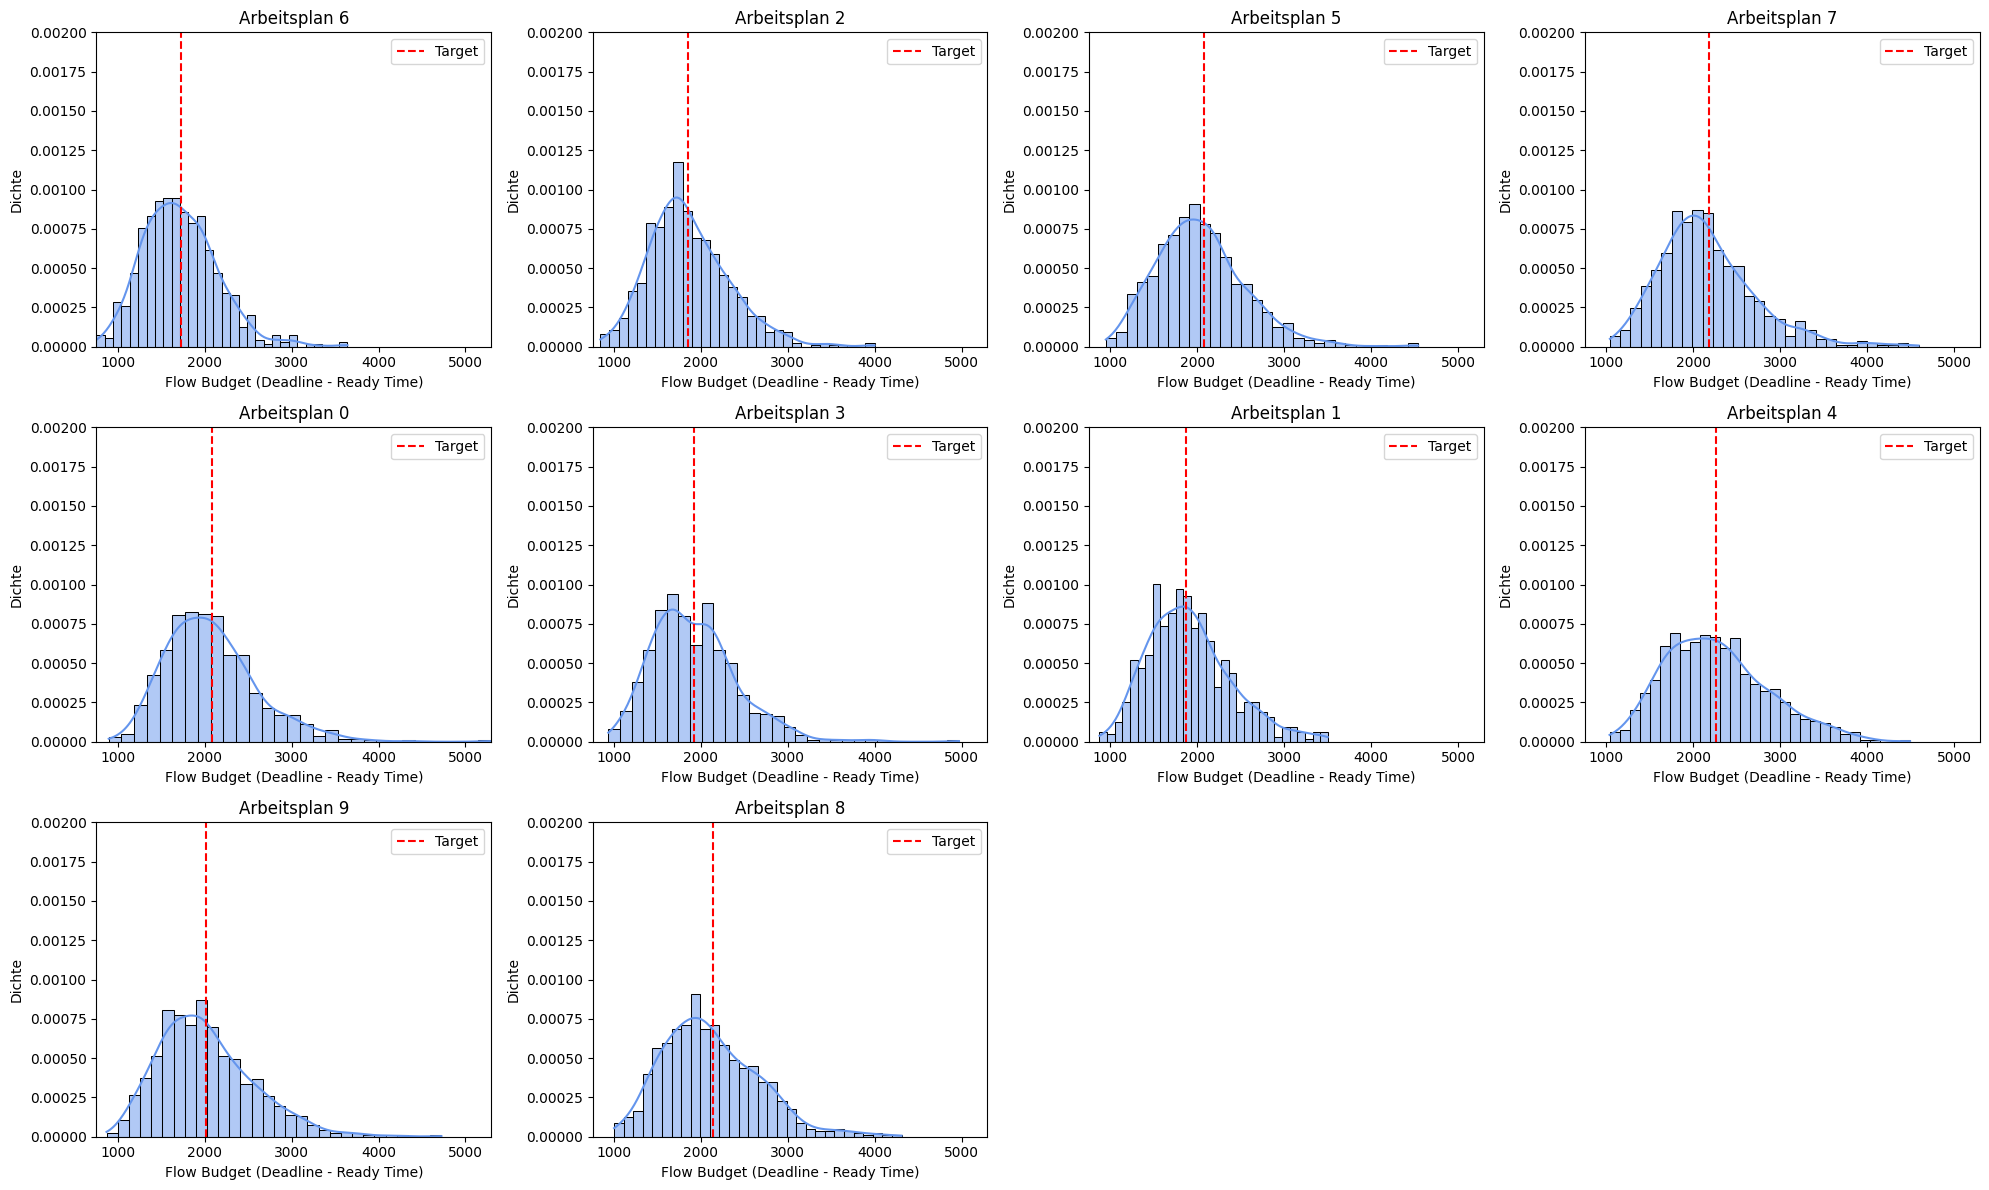

In [12]:
plotfig_empirical_flow_budget_distributions(df_jobs_times, y_max=0.002)
plt.show()

### c) Ensuring that the processing time is achievable to a certain extent in the best-case scenario

In [13]:
# min. 100 % of processing time for each job is covered in best-case
df_jobs_times_final = ensure_reasonable_deadlines(df_jobs_times, min_coverage = 1.0)

diff_count = (df_jobs_times_final["Deadline"] != df_jobs_times["Deadline"]).sum()

# Info: Compare the "Deadline" column
print(f"Number of different entries in 'Deadline': {diff_count}")

df_jobs_times_final

Number of different entries in 'Deadline': 0


,Job,Routing_ID,Operation,Machine,Start,Processing Time,Ready Time,Deadline,Total Processing Time
2,J002-0001,6,9,M04,2233.0,55.0,1440,4267,416.0
6,J002-0005,2,9,M04,2382.0,33.0,1440,3613,568.0
14,J002-0010,6,9,M04,2428.0,55.0,1440,2907,416.0
4,J002-0003,5,9,M07,2627.0,25.0,1440,3655,496.0
0,J002-0000,7,9,M03,2744.0,79.0,1440,2934,539.0
3,J002-0006,0,9,M09,2752.0,21.0,1440,3729,395.0
...,...,...,...,...,...,...,...,...,...
7273,J002-7268,9,9,M07,522143.0,45.0,519840,521687,540.0
7260,J002-7267,0,9,M09,522187.0,21.0,519840,521871,395.0
7263,J002-7266,4,9,M06,522187.0,53.0,519840,521854,393.0


## Update DB

In [14]:
JobQuery.update_job_deadlines_from_df(
    df = df_jobs_times_final,
    job_column="Job",
    deadline_column = "Deadline"
)

In [15]:
jobs = JobQuery.get_by_experiment_id(experiment_id=experiment_id)
JobMixCollection(jobs).to_dataframe()

,Job,Routing_ID,Operation,Machine,Start,Processing Time,End,Ready Time,Deadline
0,J002-0000,7,0,M02,None,31,None,1440,2934
1,J002-0000,7,1,M00,None,86,None,1440,2934
2,J002-0000,7,2,M01,None,46,None,1440,2934
3,J002-0000,7,3,M05,None,74,None,1440,2934
4,J002-0000,7,4,M04,None,32,None,1440,2934
5,J002-0000,7,5,M06,None,88,None,1440,2934
...,...,...,...,...,...,...,...,...,...
72734,J002-7273,5,4,M08,None,48,None,519840,521579
72735,J002-7273,5,5,M09,None,72,None,519840,521579
72736,J002-7273,5,6,M00,None,47,None,519840,521579
